In [5]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

In [135]:
plt.rc('figure',figsize= (14,6))


In [250]:
data = imageio.imread('sample.png')
data = np.array(data)

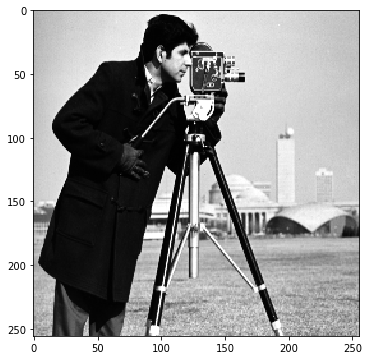

In [251]:
plt.imshow(data, cmap='gray')

## Implementing the laplacian filter

$f(x+h) = f(x) + hf'(x) + 1/2 h f''(x)$ 
$f(x-h) = f(x) - hf'(x) + 1/2 h f''(x)$ 


so now by adding the two sides we will have:


$f''(x) = \dfrac{f(x-h) - 2f(x) + f(x+h)}{h^2}$


so the kernel will be:

$kernel = [1, -2, 1]$

In [276]:
data_ = []
kernel =[1,-2,1]
for i in range(data.shape[0]):
    data_.append(signal.convolve(data[i], kernel))
data_  = np.array(data_)

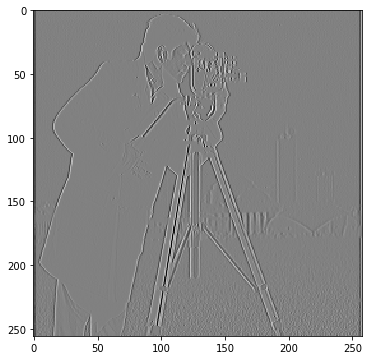

In [277]:
plt.imshow(data_, cmap = 'gray')

## 2D filter

In [139]:
kernel =  np.array([[0,1,0],[1,-4,1],[0,1,0]])

In [140]:
filtered = signal.convolve(data, kernel, mode='same')

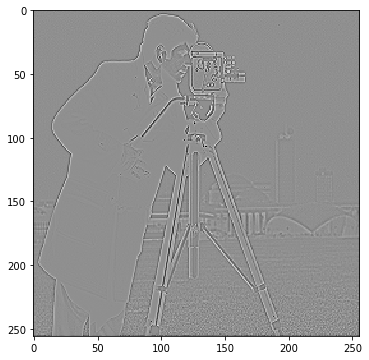

In [144]:
plt.imshow(filtered, cmap='gray')

## Hand Made

In [379]:
def my_conv(sig, kernel):

    filter_side = int(len(kernel)/2)
    sig = np.array(sig)
    sig = np.append(0,sig)
    sig = np.append(sig,0)
    result = sig.copy()

    for i in range(filter_side,len(sig)-filter_side):
        result[i] = np.sum(sig[i-filter_side:i+filter_side+1]*kernel)

    result = result[1:-1]
    
    return result




In [380]:
kernel = np.array([1,0,-1])

In [386]:
data_ = data.copy()
filter_side = int(len(kernel)/2)
data__ = []

for i in range(data.shape[0]):
    data__.append(my_conv(data[i], kernel))
    
data__ = np.array(data__)

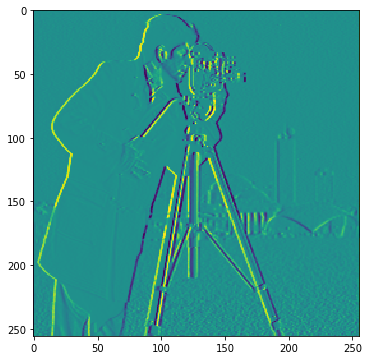

In [387]:
plt.imshow(data__)

## Comparison

In [385]:
from scipy import signal
sig = np.repeat([0., 1., 0.], 100)
win = signal.hann(50)
filtered = signal.convolve(sig, win, mode='same') / sum(win)

In [368]:
sig = [1,2,3,4,5,6,7]
kernel = [1,-2,1]
signal.convolve(sig, kernel, mode='same'), my_conv(sig, kernel)

(array([ 0,  0,  0,  0,  0,  0, -8]), array([ 0,  0,  0,  0,  0,  0, -8]))